In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## HW 1:

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$g(\beta_0, \beta_1)=\sum\limits_{i=1}^{20}(y_i-(\beta_0+\beta_1 x_i))^2$.

Answer the following questions.

In [3]:
X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [4]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

### 1. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ without using autograd.

loss function
$$loss(\beta_0, \beta_1)=L(\beta_0,\beta_1)= \sum\limits_{i=1}^{20}(y_i-(\beta_0+\beta_1 x_i))^2 $$
$$DL=$$

In [4]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
이따가 해봐라

tensor([  94.5796, -159.6058])

- broadcasting으로 beta가 늘어나서 잘 계산됨

### 2. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd.

In [9]:
Y_reshape = Y.reshape(-1,1)

In [15]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
L = torch.sum((Y - (beta[0] + beta[1] * X))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

### 3. Reshape $X$ into the shape of $[20,1]$ and name it as $XX$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

> broadcasting issue!!

In [16]:
XX = X.reshape(-1,1)
XX.shape

torch.Size([20, 1])

In [21]:
Y.shape # 이러면 broadcasting될 때, [1,20]으로 padding -> [20,20]으로 broadcasting => 이상함

torch.Size([20])

In [22]:
Y_reshape = Y.reshape(-1,1)
Y_reshape.shape

torch.Size([20, 1])

In [23]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
L = torch.sum((Y_reshape - (beta[0] + beta[1] * XX))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

### 4. Stack $X$ and $Y$ to make $MY\_data1$ of shape $[20,2]$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [36]:
MY_data1 = torch.stack([X, Y],axis=1)
MY_data1.shape

torch.Size([20, 2])

In [41]:
MY_data1[:,0].shape

torch.Size([20])

In [42]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
L = torch.sum((MY_data1[:,1] - (beta[0] + beta[1] * MY_data1[:,0]))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

### 5. Concatenate $X$ and $Y$ to make $MY\_data2$ of shape $[20,2]$. (Use the reshape if necessary) Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [51]:
X_reshape = X.reshape(-1,1)
Y_reshape = Y.reshape(-1,1)

MY_data2 = torch.concatenate([X_reshape, Y_reshape], axis=1)
MY_data2.shape

torch.Size([20, 2])

In [71]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
L = torch.sum((MY_data2[:,1] - (beta[0] + beta[1] * MY_data2[:,0]))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

In [68]:
###### not 과제
BETA = torch.tensor([[1.0], [0.5]], requires_grad=True)
ones = torch.ones([20])
X_ = torch.stack([ones, X], axis=1)
Y_ = Y.reshape(-1,1)
L = torch.sum((Y_ - X_ @ BETA)**2) # Y로 하면 잘못 계산됨
L.backward()
BETA.grad

tensor([[  94.5796],
        [-159.6058]])

In [69]:
###### not 과제
beta = torch.tensor([1.0, 0.5], requires_grad=True)
beta_ = beta.reshape(2,-1)
ones = torch.ones([20])
X_ = torch.stack([ones, X], axis=1)
Y_ = Y.reshape(-1,1)
L = torch.sum((Y_ - X_ @ beta_)**2) # beta로 하면 잘못 계산됨
L.zero_()
L.backward()
BETA.grad

tensor([[  94.5796],
        [-159.6058]])

## HW 2:

You are given

$f(x)=x^3-3x^2+4$

Answer the following questions.

### 1. Draw the graph of $(x,f(x))$ for $x\in [-5, 5]$.

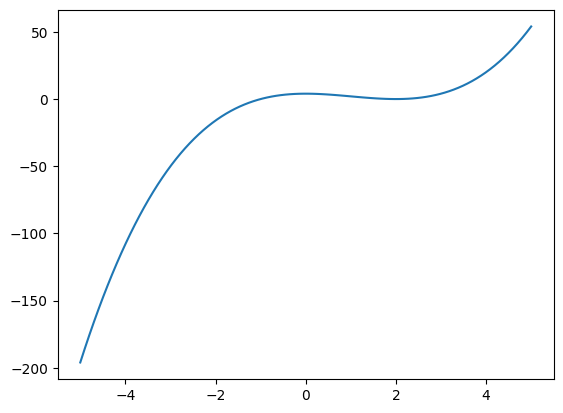

In [96]:
x = np.linspace(-5, 5, 100)
f_x = x**3 - 3*x**2 + 4
plt.plot(x, f_x)
plt.show()

### 2. Draw the graph of $(x,f^{\prime}(x))$ for $x\in [-5, 5]$ using augograd in torch.

In [98]:
x = torch.linspace(-5., 5., 100)
x.requires_grad = True
f_x = x**3 - 3*x**2 + 4
f_x.backward(torch.ones_like(f_x))
x.grad

tensor([105.0000, 101.3942,  97.8497,  94.3664,  90.9443,  87.5834,  84.2838,
         81.0453,  77.8681,  74.7521,  71.6973,  68.7037,  65.7713,  62.9002,
         60.0903,  57.3416,  54.6541,  52.0279,  49.4628,  46.9590,  44.5164,
         42.1350,  39.8148,  37.5559,  35.3581,  33.2216,  31.1463,  29.1322,
         27.1794,  25.2877,  23.4573,  21.6881,  19.9801,  18.3333,  16.7478,
         15.2234,  13.7603,  12.3584,  11.0178,   9.7383,   8.5201,   7.3630,
          6.2672,   5.2326,   4.2593,   3.3471,   2.4962,   1.7065,   0.9780,
          0.3107,  -0.2954,  -0.8402,  -1.3238,  -1.7463,  -2.1074,  -2.4074,
         -2.6462,  -2.8237,  -2.9400,  -2.9951,  -2.9890,  -2.9216,  -2.7931,
         -2.6033,  -2.3523,  -2.0401,  -1.6667,  -1.2320,  -0.7361,  -0.1791,
          0.4392,   1.1188,   1.8595,   2.6615,   3.5246,   4.4490,   5.4347,
          6.4815,   7.5895,   8.7588,   9.9893,  11.2810,  12.6339,  14.0481,
         15.5234,  17.0600,  18.6578,  20.3168,  22.0370,  23.81

In [9]:
x = torch.linspace(-5., 5., 100, requires_grad=True)
y = x**3 - 3*x**2 + 4

In [10]:
y.sum().backward()
y_prime = x.grad

그냥 `y.backward()`로 할 경우 다음과 같은 에러 발생

```Error: grad can be implicitly created only for scalar outputs```

이는 $x$가 벡터라서, $y$또한 단일 값이 아닌 벡터이기 때문에 발생한다.

> `torch`의 `backward()` 메서드의 제약 사항 두가지가 있다.
1. **스칼라값(단일 요소를 가진 텐서)**에 대해서만 호출할 수 있다.
2. 출력이 스칼라가 아닌 경우, **gradient 인자를 명시적으로 제공**해야 한다. 즉, 각 출력 요소에 대한 기울기의 공간을 제시해주어야 한다.

- 1. 조건을 만족시켜 해결하기 위해, y(함수)에 `.sum()`이나 `.mean()` 등의 함수를 적용해 스칼라값으로 만들어준 뒤에 backward()한다.
- 2. 조건을 만족시켜 해결하기 위해, 다음과 같이 backward 메서드에 gradient 인자를 명시적으로 제공한다.
```
y.backward(gradient=torch.ones_like(y))
```

In [ ]:
# plt로 그래프를 그리기 위해 tensor를 numpy 객체로 변환한다.
y_prime = y_prime.detach().numpy()
x = x.detach().numpy()

- `detach()` 메소드는 현재 Tensor 객체와 동일한 데이터를 가지지만 연산에서 분리된 새로운 Tensor 객체를 생성한다. 일반적으로 Tensor 객체를 다른 Tensor 객체로 변환하고자 할 때 사용된다.

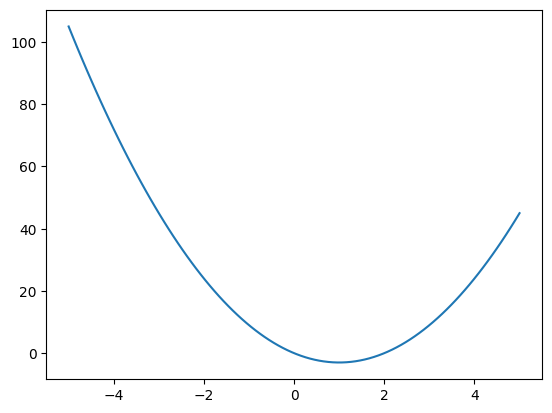

In [11]:
plt.plot(x, y_prime)
plt.show()